In [1]:
from binance.client import Client
import pandas as pd

API_KEY = 'plGnPKANetCu4LAzt9Bwp3OFj6inSTSbhc1iVoEpItGSoeDm18Rszmruek50qPfS'
API_SECRET = 'h9Hh1BCObXSCmNg4AtFQto81V5msxw4vLNO4TOMgdX9XYrkWbWZ8xzCTFi4bK7zX'
client = Client(API_KEY, API_SECRET)

In [2]:
def binanceDataFrame(klines):
    df = pd.DataFrame(klines,dtype=float, columns = ('Open Time',
                                                                    'open',
                                                                    'high',
                                                                    'low',
                                                                    'close',
                                                                    'volume',
                                                                    'Close time',
                                                                    'Quote asset volume',
                                                                    'Number of trades',
                                                                    'Taker buy base asset volume',
                                                                    'Taker buy quote asset volume',
                                                                    'Ignore'))

    df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
    df = df.set_index('Open Time')
    
    return df

new_date_load = False 
if new_date_load:
    candlesticks = client.get_historical_klines("xrpusdt.csv", Client.KLINE_INTERVAL_5MINUTE, '1 months')#"31 Aug, 2021", "1 Sep, 2021")
    df = binanceDataFrame(candlesticks)
else:
    
    df = pd.read_csv("xrp_sincejan5min.csv")
    df['Open Time'] = pd.to_datetime(df['Open Time'])
    df = df.set_index('Open Time')



In [3]:
# df.to_csv("xrpusdt.csv")

In [4]:
# from ta import add_all_ta_features
# df = add_all_ta_features(
#     df, open="open", high="high", low="low", close="close", volume="volume", fillna=True)

In [5]:
# num_candles = -6
# y = df.close.shift(-6)

# y = y>df.close

In [6]:
# cols = df.columns

In [7]:
# from sklearn.model_selection import train_test_split
# # from sklearn.apreprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit_transform(df[cols])
# X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(df[cols]),y, random_state = 2021,shuffle=False)
# # import  matplotlib.pyplot as plt 
# # plt.plot(df.close)


In [8]:
# from sklearn.ensemble import GradientBoostingClassifier


# model = GradientBoostingClassifier()
# model.fit(X_train,y_train)

In [9]:

# import matplotlib.pyplot as plt 
# pred = model.predict(X_train)

# # plt.plot(pred[-500:] ,color = 'r')
# plt.plot(y_train.values[-500:])

In [10]:
# import matplotlib.pyplot as plt 
# pred = model.predict(X_test)

# # plt.plot(pred[-200:] ,color = 'r')
# # plt.plot(y_test.values[-200:])

In [11]:
# from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score

# accuracy_score(pred,y_test.values)

In [12]:
df.shape

(69812, 11)

In [13]:

import backtrader as bt
import backtrader.indicators as btind


In [14]:
import backtrader as bt
import datetime as dt

# #Add data feed to Cerebro
data = bt.feeds.PandasData(dataname=df)


In [15]:
# printTradeAnalysis(firstStrat.analyzers.ta.get_analysis())

In [16]:
def printTradeAnalysis(cerebro, analyzers):
    print('Backtesting Results')
    if hasattr(analyzers, 'ta'):
        ta = analyzers.ta.get_analysis()

        openTotal         = ta.total.open          
        closedTotal       = ta.total.closed        
        wonTotal          = ta.won.total           
        lostTotal         = ta.lost.total          

        streakWonLongest  = ta.streak.won.longest  
        streakLostLongest = ta.streak.lost.longest 

        pnlNetTotal       = ta.pnl.net.total       
        pnlNetAverage     = ta.pnl.net.average     

        print('Open Positions', openTotal  )
        print('Closed Trades',  closedTotal)
        print('Winning Trades', wonTotal   )
        print('Loosing Trades', lostTotal  )
       

        print('Longest Winning Streak',   streakWonLongest )
        print('Longest Loosing Streak',   streakLostLongest)
        print('Strike Rate (Win/closed)', (wonTotal / closedTotal) * 100 if wonTotal and closedTotal else 0)
        

#         print(format, 'Inital Portfolio Value', '${}'.format(100))
        print( 'Final Portfolio Value',  '${}'.format(cerebro.broker.getvalue()))
        print( 'Net P/L',                '${}'.format(round(pnlNetTotal,   2)) )
        print( 'P/L Average per trade',  '${}'.format(round(pnlNetAverage, 2)))
        print('\n')

    if hasattr(analyzers, 'drawdown'):
        print('Drawdown', '${}'.format(analyzers.drawdown.get_analysis()['drawdown']))
    if hasattr(analyzers, 'sharpe'):
        print( 'Sharpe Ratio:', analyzers.sharpe.get_analysis()['sharperatio'])
    if print(analyzers, 'vwr'):
        print( 'VRW', analyzers.vwr.get_analysis()['vwr'])
    if hasattr(analyzers, 'sqn'):
        print( 'SQN', analyzers.sqn.get_analysis()['sqn'])
    print('\n')

    print('Transactions')
    print( 'Date', 'Amount', 'Price', 'SID', 'Symbol', 'Value')
    for key, value in analyzers.txn.get_analysis().items():
        print( key.strftime("%Y/%m/%d %H:%M:%S"), value[0][0], value[0][1], value[0][2], value[0][3], value[0][4])



In [17]:
"""
Defines class / functions tools for strategies.
"""
import backtrader as bt

df

,open,high,low,close,volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open Time,,,,,,,,,,,
2021-01-01 00:00:00,0.21953,0.22063,0.21900,0.22032,2982371.1,1.609459e+12,6.560673e+05,1146.0,1566404.7,3.445993e+05,0.0
2021-01-01 00:05:00,0.22034,0.22034,0.21837,0.21861,3712166.2,1.609460e+12,8.144195e+05,1127.0,1441945.7,3.160976e+05,0.0
2021-01-01 00:10:00,0.21862,0.21874,0.21600,0.21659,5613872.7,1.609460e+12,1.219575e+06,2253.0,2057891.3,4.471489e+05,0.0
2021-01-01 00:15:00,0.21675,0.21825,0.21607,0.21819,3334224.3,1.609460e+12,7.237959e+05,1263.0,2144272.5,4.653600e+05,0.0
2021-01-01 00:20:00,0.21823,0.22173,0.21750,0.21952,5272193.8,1.609461e+12,1.155412e+06,2097.0,3369207.7,7.384637e+05,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31 23:40:00,1.18010,1.19390,1.17900,1.19220,2434263.0,1.630453e+12,2.888484e+06,4434.0,1399486.0,1.660494e+06,0.0
2021-08-31 23:45:00,1.19210,1.19370,1.18790,1.19000,2166523.0,1.630454e+12,2.579870e+06,3883.0,1180751.0,1.406009e+06,0.0
2021-08-31 23:50:00,1.19000,1.19870,1.18930,1.19760,2138371.0,1.630454e+12,2.553398e+06,4008.0,1254981.0,1.498758e+06,0.0


In [18]:

class firstStrategy(bt.Strategy):
    params = (
        ('rsi_period',14),
        ('ema_period',13),
        ('stop_loss',1),
        ('ema1',20),
        ('ema2',50),
        ('ema3',200),

    )
    def __init__(self):
        self.startcash = self.broker.getvalue()
        self.rsi = bt.indicators.RSI(self.data.close, period=self.params.rsi_period)
        self.rsi_fast = bt.indicators.RSI(self.data.close, period=7)
        self.ema1 = bt.indicators.EMA(self.data.close, period=self.params.ema1) 
        self.ema2 = bt.indicators.EMA(self.data.close, period=self.params.ema2) 

        self.ema3 = bt.indicators.EMA(self.data.close, period=self.params.ema3) 


        self.o_li = list()

        # To keep track of pending orders
        self.order = None  
        self.stopOrder = None

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
#         dt = dt or self.datas[0].datetime.datetime(0)
# #         print('%s, %s' % (dt.isoformat(), txt))
    def notify_trade(self, trade):
        if not trade.isclosed:
            return

#         self.log("OPERATION PROFIT, GROSS %.2f, NET %.2f" % (trade.pnl, trade.pnlcomm))
        

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # An active Buy/Sell order has been submitted/accepted - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash

        if order.status in [order.Completed]:
#             if order.isbuy():
#                 self.log(f'BUY EXECUTED, {order.executed.price:.5f}')
# #                 stop_price = order.executed.price * (1.0 - self.params.stop_loss)
# #                 self.sell(exectype=bt.Order.Stop, price=stop_price)
#             elif order.issell():
#                 self.log(f'SELL EXECUTED, {order.executed.price:.5f}')
#                 self.log
            self.bar_executed = len(self)

        
    def next(self):

        if not self.position:
            if self.ema2>self.ema3 and self.rsi<30:
                size = 1000/self.datas[0].close[0]

                self.order = self.buy(price=(self.datas[0].close[0]),exectype=bt.Order.Market,size=size)
#             if self.rsi>70 and self.order.Completed:
#                 self.order = self.sell(price=(self.datas[0].close[0]),exectype=bt.Order.Market,size=1000)

        else:
            if self.order and (self.data.close - self.order.price)!=0.0:
                change = (self.data.close - self.order.price)/self.order.price
                if change>0.01 or change<-0.01:
#                     print("selling at change:", change)
                    self.sell()

    def stop(self):
        pnl = round(self.broker.getvalue() - 2000,2)
        print('RSI Period: {} EMA1: {} EMA2 : {} EMA3: {} Final PnL: {}'.format(
            self.params.rsi_period, self.params.ema1,self.params.ema2,self.params.ema3,pnl))

In [26]:
import backtrader as bt
from backtrader_plotting import Bokeh
from backtrader_plotting.schemes import Tradimo
# ======================================================================================================================
# MAIN
# ======================================================================================================================

# Create an instance of cerebro
cerebro = bt.Cerebro(stdstats=False)

# Be selective about what we chart
#cerebro.addobserver(bt.observers.Broker)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)
cerebro.addobserver(bt.observers.DrawDown)
cerebro.addobserver(bt.observers.Trades)

# Set the investment capital
cerebro.broker.setcash(2000)
cerebro.broker.setcommission(.001)

# Set position size
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)

# Add our strategy
cerebro.addstrategy(firstStrategy , rsi_period=8, ema1 = (20),ema2 = (100), ema3 = (200))

cerebro.adddata(data)


# Add analyzers
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='ta')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe', riskfreerate=0.0, annualize=True, timeframe=bt.TimeFrame.Days)
cerebro.addanalyzer(bt.analyzers.VWR, _name='vwr')
cerebro.addanalyzer(bt.analyzers.SQN, _name='sqn')
cerebro.addanalyzer(bt.analyzers.Transactions, _name='txn')
# # Run our Backtest
backtest = cerebro.run()
backtest_results = backtest[0]



RSI Period: 8 EMA1: 20 EMA2 : 100 EMA3: 200 Final PnL: -360.31


In [27]:
# cerebro.optstrategy(firstStrategy,  rsi_period=range(4,21), ema1 = (20),ema2 = (100), ema3 = (200))
# opt_runs = cerebro.run(maxcpus = 1)

# # Generate results list
# final_results_list = []
# for run in opt_runs:
#     for strategy in run:
#         value = round(strategy.broker.get_value(),2)
#         PnL = round(value - startcash,2)
#         period = strategy.params.period
#         final_results_list.append([period,PnL])

# #Sort Results List
# by_period = sorted(final_results_list, key=lambda x: x[0])
# by_PnL = sorted(final_results_list, key=lambda x: x[1], reverse=True)

# #Print results
# print('Results: Ordered by period:')
# for result in by_period:
#     print('Period: {}, PnL: {}'.format(result[0], result[1]))
# print('Results: Ordered by Profit:')
# for result in by_PnL:
#     print('Period: {}, PnL: {}'.format(result[0], result[1]))

<IPython.core.display.Javascript object>


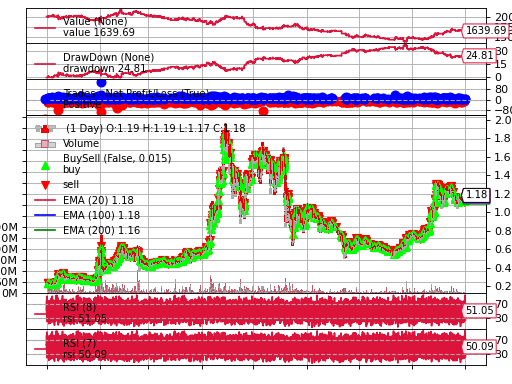

In [28]:
figure = cerebro.plot(style ='candlebars')[0][0]
figure.savefig('example.png')

In [29]:
printTradeAnalysis(cerebro,backtest_results.analyzers)

Backtesting Results
Open Positions 0
Closed Trades 810
Winning Trades 465
Loosing Trades 345
Longest Winning Streak 15
Longest Loosing Streak 11
Strike Rate (Win/closed) 57.407407407407405
Final Portfolio Value $1639.6931049798884
Net P/L $-360.31
P/L Average per trade $-0.44


Drawdown $24.81004924554719
Sharpe Ratio: -0.7472743369392666
<backtrader.metabase.ItemCollection object at 0x0000027B883FCB80> vwr
SQN -0.7857507766360029


Transactions
Date Amount Price SID Symbol Value
2021/01/01 17:50:00 4206.0988433228185 0.23765999999999998 0  -999.621451104101
2021/01/01 18:15:00 -4206.0988433228185 0.24033000000000002 0  1010.8517350157731
2021/01/01 18:45:00 4287.429257417252 0.23323000000000002 0  -999.9571257074258
2021/01/01 19:05:00 -4287.429257417252 0.23019 0  986.9233407648774
2021/01/01 23:25:00 4245.923913043479 0.23551999999999998 0  -1000.0000000000001
2021/01/02 00:25:00 -4245.923913043479 0.23253000000000001 0  987.3046875000002
2021/01/02 00:30:00 4312.575470070726 0.2318

2021/02/12 14:50:00 1788.5888034340903 0.5591 0  -1000.0
2021/02/12 15:00:00 -1788.5888034340903 0.56845 0  1016.7233053121087
2021/02/12 19:50:00 1736.8649587494572 0.57577 0  -1000.0347372991749
2021/02/12 21:40:00 -1736.8649587494572 0.58295 0  1012.505427702996
2021/02/13 04:00:00 1594.6420028703556 0.627 0  -999.8405357997129
2021/02/13 04:20:00 -1594.6420028703556 0.63372 0  1010.5565300590016
2021/02/13 05:25:00 1611.967244825585 0.62049 0  -1000.2095557418273
2021/02/13 05:35:00 -1611.967244825585 0.61483 0  991.0858211361144
2021/02/13 07:35:00 1644.1689548017953 0.60821 0  -1000.0
2021/02/13 08:00:00 -1644.1689548017953 0.59951 0  985.6957300932243
2021/02/13 08:05:00 1711.186023032564 0.5844699999999999 0  -1000.1368948818425
2021/02/13 08:10:00 -1711.186023032564 0.59185 0  1012.765447731823
2021/02/13 10:15:00 1664.5859342488557 0.6007399999999999 0  -999.9833541406574
2021/02/13 10:25:00 -1664.5859342488557 0.59388 0  988.5642946317104
2021/02/13 10:30:00 1681.71804315288

2021/03/22 21:35:00 -1832.6766242096583 0.55211 0  1011.8390909923944
2021/03/22 23:55:00 1832.1393891647276 0.5458 0  -999.9816786061083
2021/03/23 00:10:00 -1832.1393891647276 0.55378 0  1014.602150931643
2021/03/23 04:30:00 1767.5964223848414 0.56606 0  -1000.5656308551634
2021/03/23 05:00:00 -1767.5964223848414 0.57429 0  1015.1129494113906
2021/03/23 06:10:00 1800.277242695375 0.5554399999999999 0  -999.945991682719
2021/03/23 06:40:00 -1800.277242695375 0.5614399999999999 0  1010.7476551388912
2021/03/23 11:50:00 1779.6760989499912 0.56225 0  -1000.6228866346327
2021/03/23 12:10:00 -1779.6760989499912 0.57085 0  1015.9281010856024
2021/03/23 13:50:00 1762.580417731559 0.56762 0  -1000.4758967127875
2021/03/23 16:10:00 -1762.580417731559 0.56043 0  987.8029435092976
2021/03/23 17:25:00 1790.4782367370324 0.55834 0  -999.6956186997546
2021/03/23 19:25:00 -1790.4782367370324 0.55108 0  986.6967467010438
2021/03/24 15:45:00 1823.7192931264021 0.5483600000000001 0  -1000.054711578794


2021/04/21 10:05:00 -721.7142156049048 1.3672799999999998 0  986.7854127122741
2021/04/21 10:10:00 742.2362092512321 1.34725 0  -999.9777329137225
2021/04/21 10:35:00 -742.2362092512321 1.32656 0  984.6208657443145
2021/04/21 10:40:00 750.4239895540982 1.3326200000000001 0  -1000.0300169595824
2021/04/21 10:50:00 -750.4239895540982 1.31839 0  989.3514835882274
2021/04/21 10:55:00 757.8972897592919 1.3201 0  -1000.5002122112412
2021/04/21 11:05:00 -757.8972897592919 1.3388200000000001 0  1014.6880494755352
2021/04/22 17:55:00 755.6522790472735 1.32336 0  -999.9999999999999
2021/04/22 18:20:00 -755.6522790472735 1.3011 0  983.1791802684075
2021/04/22 18:25:00 766.7594445594584 1.30445 0  -1000.1993574555856
2021/04/22 18:30:00 -766.7594445594584 1.3194299999999999 0  1011.6854139350861
2021/04/22 19:15:00 778.816199376947 1.284 0  -1000.0
2021/04/22 19:30:00 -778.816199376947 1.29712 0  1010.2180685358255
2021/04/24 00:45:00 899.1188635137564 1.1123299999999998 0  -1000.1168854522565
202

2021/05/25 12:50:00 -1134.0440009072352 0.8987 0  1019.1653436153323
2021/05/26 08:10:00 976.0858955588092 1.0248 0  -1000.2928257686676
2021/05/26 08:35:00 -976.0858955588092 1.0386 0  1013.7628111273792
2021/05/26 10:30:00 988.2399446585631 1.012 0  -1000.0988239944659
2021/05/26 10:50:00 -988.2399446585631 1.0224 0  1010.3765194189149
2021/05/26 13:10:00 985.1246182642105 1.0151 0  -1000.0
2021/05/26 13:20:00 -985.1246182642105 0.9992 0  984.3365185695991
2021/05/26 13:25:00 1003.3109260559847 0.9962 0  -999.498344536972
2021/05/26 14:00:00 -1003.3109260559847 0.9778 0  981.0374234975419
2021/05/26 15:20:00 1018.4336490477646 0.9819 0  -1000.0
2021/05/26 16:05:00 -1018.4336490477646 0.9995 0  1017.9244322232407
2021/05/26 17:05:00 1027.326895418122 0.9733 0  -999.8972673104581
2021/05/26 17:20:00 -1027.326895418122 0.9854 0  1012.3279227450174
2021/05/27 00:35:00 998.2032341784787 1.0019 0  -1000.0998203234178
2021/05/27 01:15:00 -998.2032341784787 0.9913 0  989.5188660411259
2021/0

2021/07/11 14:00:00 -1606.6838046272494 0.6298 0  1011.8894601542418
2021/07/11 21:00:00 1588.8147442008262 0.6294 0  -1000.0
2021/07/11 21:25:00 -1588.8147442008262 0.6369 0  1011.9161105815062
2021/07/12 00:15:00 1578.0337699226764 0.6337 0  -1000.0000000000001
2021/07/12 00:35:00 -1578.0337699226764 0.642 0  1013.0976802903582
2021/07/12 09:25:00 1546.3120457708364 0.6467 0  -1000.0
2021/07/12 10:25:00 -1546.3120457708364 0.64 0  989.6397092933354
2021/07/12 10:30:00 1560.549313358302 0.6408 0  -1000.0
2021/07/12 12:30:00 -1560.549313358302 0.6342 0  989.7003745318351
2021/07/12 12:35:00 1579.2798483891345 0.6334 0  -1000.3158559696777
2021/07/12 17:20:00 -1579.2798483891345 0.6242 0  985.7864813644977
2021/07/13 10:55:00 1588.057805304113 0.6298 0  -1000.1588057805303
2021/07/13 12:40:00 -1588.057805304113 0.6212 0  986.5015086549149
2021/07/14 23:25:00 1618.6468112657817 0.6178 0  -1000.0
2021/07/15 01:05:00 -1618.6468112657817 0.6257 0  1012.7873098089997
2021/07/15 02:00:00 1621

2021/08/21 01:55:00 -808.6035416835126 1.2491 0  1010.0266839168756
2021/08/21 07:10:00 798.7220447284345 1.2521 0  -1000.0798722044728
2021/08/21 07:50:00 -798.7220447284345 1.2645 0  1009.9840255591055
2021/08/21 09:10:00 798.9134776703683 1.2516 0  -999.9201086522329
2021/08/21 11:10:00 -798.9134776703683 1.2371 0  988.3358632260126
2021/08/21 11:15:00 814.3985666585227 1.2278 0  -999.9185601433342
2021/08/21 12:20:00 -814.3985666585227 1.2428 0  1012.1345386432118
2021/08/22 12:10:00 809.1924259588931 1.2357 0  -999.9190807574042
2021/08/22 13:10:00 -809.1924259588931 1.2232 0  989.8041754329181
2021/08/22 13:15:00 816.3931749530574 1.2248 0  -999.9183606825047
2021/08/22 14:50:00 -816.3931749530574 1.2108 0  988.488856233162
2021/08/23 05:50:00 807.2979736820861 1.2387 0  -1000.0
2021/08/23 08:15:00 -807.2979736820861 1.2696 0  1024.9455073867766
2021/08/23 10:10:00 786.8439688409788 1.2707 0  -999.8426312062318
2021/08/23 10:20:00 -786.8439688409788 1.2848 0  1010.9371311668896
2